<a href="https://colab.research.google.com/github/RazvanPorojan/metal_python/blob/master/Recruitment_Fee_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.models import model_from_json
import numpy

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

Load Data

In [4]:
data = pd.read_csv("target_calc.csv")
data.head()


,deals_closed,good_cvs,signed_ndas,worked_jobs,payment
0,0.0,4.0,0.0,3.0,1.35
1,0.0,7.0,1.0,4.0,2.05
2,1.0,10.0,1.0,7.0,3.35
3,2.0,20.0,2.0,10.0,5.50
4,3.0,20.0,2.0,10.0,6.50


In [5]:
data.dtypes

deals_closed    float64
good_cvs        float64
signed_ndas     float64
worked_jobs     float64
payment         float64
dtype: object

In [20]:
data.describe()

,deals_closed,good_cvs,signed_ndas,worked_jobs,payment
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.111111,17.000000,2.444444,8.222222,5.594444
std,1.763834,8.276473,1.589899,2.862594,2.888062
min,0.000000,4.000000,0.000000,3.000000,1.350000
25%,1.000000,10.000000,1.000000,7.000000,3.350000
50%,2.000000,20.000000,2.000000,10.000000,5.500000
75%,3.000000,20.000000,4.000000,10.000000,8.000000
max,5.000000,30.000000,4.000000,10.000000,9.600000


In [0]:
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and accuracies
        self.losses = []
        #self.acc = []
        #self.val_losses = []
        #self.val_acc = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        #self.acc.append(logs.get('acc'))
        #self.val_losses.append(logs.get('val_loss'))
        #self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options
            plt.style.use("seaborn")
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.plot(N, self.losses, label = "train_loss")
            #plt.plot(N, self.acc, label = "train_acc")
            #plt.plot(N, self.val_losses, label = "val_loss")
            #plt.plot(N, self.val_acc, label = "val_acc")
            plt.title("Training Loss and Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss/Accuracy")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

Define Keras Model

In [16]:
#model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[4])])
#model.compile(optimizer='sgd', loss='mean_squared_error')

model = tf.keras.Sequential()

model.add(keras.layers.Dense(1, input_dim=4, activation='relu'))
#model.add(keras.layers.Dense(1, kernel_initializer='normal'))

sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)



# Compile model
model.compile(loss='mean_squared_error', optimizer="sgd")
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


Define input and output

In [17]:
xs = data[["deals_closed","good_cvs","signed_ndas","worked_jobs"]].to_numpy()
ys = data[["payment"]].to_numpy()
print(xs)
print("---")
print(ys)

[[ 0.  4.  0.  3.]
 [ 0.  7.  1.  4.]
 [ 1. 10.  1.  7.]
 [ 2. 20.  2. 10.]
 [ 3. 20.  2. 10.]
 [ 4. 20.  4. 10.]
 [ 5. 22.  4. 10.]
 [ 1. 20.  4. 10.]
 [ 3. 30.  4. 10.]]
---
[[1.35]
 [2.05]
 [3.35]
 [5.5 ]
 [6.5 ]
 [8.5 ]
 [9.6 ]
 [5.5 ]
 [8.  ]]


Are Xs really independent?

Train Model

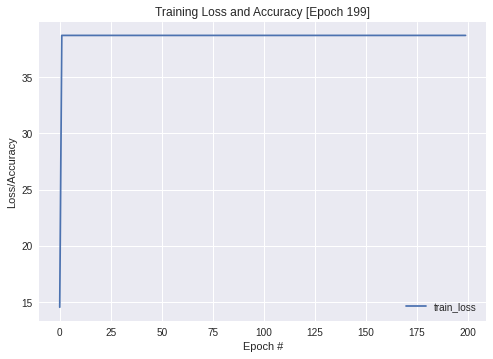

1/1 [==============================] - 0s 210ms/step - loss: 38.7119


In [18]:
model.fit(xs, ys, epochs=200, callbacks=[plot_losses])

In [12]:
model.get_weights()

[array([[ 0.6233982 ],
        [ 0.05459952],
        [ 0.84512174],
        [-0.9974995 ]], dtype=float32), array([0.], dtype=float32)]

Load Weights

In [0]:
ideal = [np.array([[ 1.0  ],
        [0.05],
        [ 0.5],
        [ 0.05]], dtype="float32"), np.array([1.0], dtype="float32")]
model.set_weights(ideal)

In [14]:
print(model.predict([[ 0.0,4.0,0.0,3.0]])) #1.35
print(model.predict([[ 0.0,7.0,1.0,4.0]])) #2.05
print(model.predict([[ 1.0,10.0,1.0,7.0]])) #3.35
print(model.predict([[ 2.0,20.0,2.0,10.0]])) #5.5
print(model.predict([[ 4.0,20.0,4.0,10.0]])) #8.5
print(model.predict([[ 3.0,30.0,4.0,10.0]])) #8

[[1.35]]
[[2.0500002]]
[[3.35]]
[[5.5]]
[[8.5]]
[[8.]]
